### TTest-40k 1 Mask 10 Rounds of AES

In [4]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import scipy
from tqdm import tqdm, trange
#from tqdm import tnrange,tqdm_notebook
import matplotlib.pyplot as plt
from scipy.stats import t
import matplotlib.pyplot as plt
import gmpy2
from gmpy2 import mpz,mpq,mpfr,mpc
import os
import scipy.io as sio
import matplotlib.pyplot as plt
from tqdm import tnrange,tqdm_notebook

In [5]:
def prodTraces(path,dataset):
    myArray = []
    myArray = np.array(myArray)
    index = 0
    index2 = 1
    fileNames = np.arange(50, 40050, 50).tolist()
    for file in os.listdir(path):
        mats = []
        mats = sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False)
        myArray = myArray.tolist()
        
        if dataset == 1:
            start_flag = 0
        if dataset == 2:
            start_flag = 1
            
        for j in range(start_flag,50,2):
            myArray.append(mats['data'][j] * mats['data'][j])
        myArray = np.array(myArray)
        myArray = myArray.sum(axis=0)
        myArray = np.array([myArray])
        index = index + 1       
    return(myArray)

In [6]:
def sumTraces(path,dataset):
    myArray = []
    myArray = np.array(myArray)
    index = 0
    fileNames = np.arange(50, 40050, 50).tolist()
    for file in os.listdir(path):
        mats = []
        mats = sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False)
        myArray = myArray.tolist()
        
        # switch between datset 1 and 2
        if dataset == 1:
            start_flag = 0
        if dataset == 2:
            start_flag = 1
        
        for j in range(start_flag,50):
            myArray.append(mats['data'][j])
        myArray = np.array(myArray)
        myArray = myArray.sum(axis=0)
        myArray = np.array([myArray])
        index = index + 1       
    return(myArray)

### Calculate sum and prod

In [7]:
# calulate sum for dataset 1
df_ds1_sum = sumTraces('../real_traces/SBOX_traces_40k_3sh/spot_4_12/traces/',1)
df_ds1_sum = np.array(df_ds1_sum)

In [8]:
# calulate sum for dataset 2
df_ds2_sum = sumTraces('../real_traces/SBOX_traces_40k_3sh/spot_4_12/traces/',2)
df_ds2_sum = np.array(df_ds2_sum)

In [9]:
# calulate prod for dataset 1
df_ds1_prod = prodTraces('../real_traces/SBOX_traces_40k_3sh/spot_4_12/traces/',1)
df_ds1_prod = np.array(df_ds1_prod)

In [10]:
# calulate sum for dataset 2
df_ds2_prod = prodTraces('../real_traces/SBOX_traces_40k_3sh/spot_4_12/traces/',2)
df_ds2_prod = np.array(df_ds2_prod)

### Write Files 

In [11]:
pd.DataFrame(df_ds1_sum).to_csv('../real_traces/SBOX_traces_40k_3sh/df_ds1_sum.csv',index=False,header=False)

In [12]:
pd.DataFrame(df_ds2_sum).to_csv('../real_traces/SBOX_traces_40k_3sh/df_ds2_sum.csv',index=False,header=False)

In [13]:
pd.DataFrame(df_ds1_prod).to_csv('../real_traces/SBOX_traces_40k_3sh/df_ds1_prod.csv',index=False,header=False)

In [14]:
pd.DataFrame(df_ds2_prod[0]).to_csv('../real_traces/SBOX_traces_40k_3sh/df_ds2_prod.csv',index=False,header=False)

In [15]:
from numpy import genfromtxt
df_ds1_prod = genfromtxt('../real_traces/SBOX_traces_40k_3sh/df_ds1_sum.csv', delimiter=',')
df_ds2_prod = genfromtxt('../real_traces/SBOX_traces_40k_3sh/df_ds2_sum.csv', delimiter=',')
df_ds1_sum = genfromtxt('../real_traces/SBOX_traces_40k_3sh/df_ds1_prod.csv', delimiter=',')
df_ds2_sum = genfromtxt('../real_traces/SBOX_traces_40k_3sh/df_ds2_prod.csv', delimiter=',')

In [16]:
df_ds1_mean = df_ds1_sum / 20000

In [17]:
df_ds2_mean = df_ds2_sum / 20000

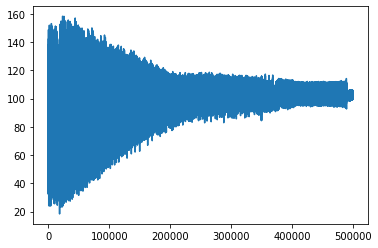

In [20]:
plt.plot(df_ds1_mean)

In [21]:
#plt.plot(df_ds1_mean[30000:500000])

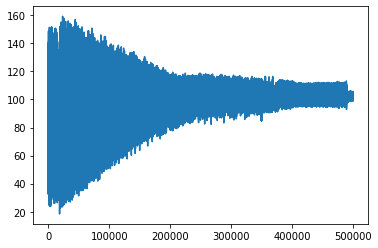

In [22]:
plt.plot(df_ds2_mean)

In [23]:
df_ds1_var = 1/20000*(((df_ds1_sum ** 2) / 20000) + df_ds1_prod)

In [24]:
df_ds2_var = 1/20000*(((df_ds2_sum ** 2) / 20000) + df_ds2_prod)

In [25]:
df_ds1_std = np.sqrt(df_ds1_var)

In [26]:
df_ds2_std = np.sqrt(df_ds2_var)

In [27]:
import matplotlib.pyplot as plt

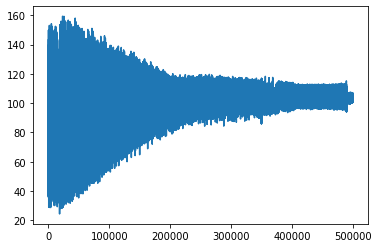

In [28]:
plt.plot(df_ds1_std)

### T-Test 

In [29]:
def tMean(data1,data2):
    return(data1 - data2)

In [30]:
def tSN(std,n):
    return(std**2/n)

In [31]:
def ttestCalc(mean1,mean2,std1,std2,data_len):
    tv = (tMean(mean1,mean2)) / (np.sqrt(tSN(std1,data_len) + tSN(std2,data_len)))
    return(np.abs(tv))

In [32]:
def tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,tLeng):
    arr_collect_All=[]
    #for j in tnrange(0,(int(tLeng/2))):
    for j in tnrange(0,tLeng):    
        arr_collect=[]
        arr_collect_All.append(ttestCalc(df_ds1_mean[j],df_ds2_mean[j],df_ds1_std[j],df_ds2_std[j],20000))
            #arr_collect.append(ttestCalc(df_ds1_mean[j],df_ds2_mean[i],df_ds1_std[j],df_ds2_std[i],data1,data2))
        #arr_collect_All.append(np.amax(arr_collect))
    return(arr_collect_All)

In [33]:
myTest = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,len(df_ds2_std))

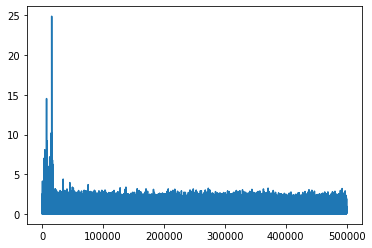

In [34]:
plt.plot(myTest)

In [ ]:
myTest = tTest(df_ds1_mean[30000:500000],df_ds2_mean[30000:500000],df_ds1_std[30000:500000],df_ds2_std[30000:500000],len(df_ds2_std[30000:500000]))

In [ ]:
plt.plot(myTest)

### Degree of freedom

In [36]:
def vS2(data_len,df_ds1_std,df_ds2_std):    
    s22 = (tSN(df_ds1_std,data_len) + tSN(df_ds2_std,data_len))**2
    return(s22)

In [37]:
def df(df_ds1_std,df_ds2_std):
    
    data_len = 20000
    s22 = vS2(data_len,df_ds1_std,df_ds2_std)
    
    term1 = (df_ds1_std**2 / (data_len))**2 / (data_len - 1)
    term2 = (df_ds2_std**2 / (data_len))**2 / (data_len - 1)

    v = s22 / (term1 + term2)
    
    return(v)

### CDF

In [41]:
def cdf(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std):
    cdf_array = []
    
    colLen = 500000

    tV = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,colLen)
    #print(tV)
    v = df(df_ds1_std,df_ds2_std)
    
    
    #print("t-value",tV[24])
    #print("v-value",v[24])
    
    for i in range(0,colLen):
        cdf_array.append(t.cdf(-1 *(tV[i]),v[i]))
        
    return(cdf_array)

### T-Test TS1

In [42]:
#df_CDF = cdf(df_ds1_mean[30000:500000],df_ds2_mean[30000:500000],df_ds1_std[30000:500000],df_ds2_std[30000:500000])

In [44]:
df_CDF = cdf(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std)

In [ ]:
pd.DataFrame(df_CDF).to_csv('../real_traces/SBOX_traces_40k/df_CDF2.csv',index=False,header=False)

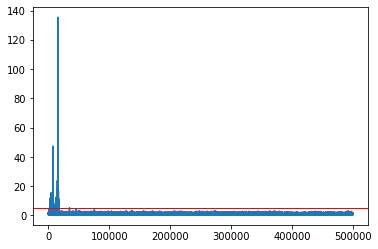

In [45]:
plt.plot(-np.log10(df_CDF),'-')
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()